In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
data=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dict_live={0:"Dead",1:"Survived"}
dict_sex={"female":1,"male":0}

data['Gender']=data['Sex'].apply(lambda x: dict_sex[x])

features=data[['Pclass','Gender']].to_numpy()
label=data['Survived'].to_numpy()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)

ACTIVATION FUNCTIONS

In [ ]:
def sigmoid(x,derivative=False):
  sig=1/(1+np.exp(-x))
  if(derivative):
    return sig*(1-sig)

  return sig



In [ ]:
def relu(x,derivative=False):
  if(derivative):
    return np.heaviside(x,1)

  return np.maximum(0,x)

NEURAL NETWORK

In [ ]:
features.shape

(891, 2)

In [ ]:
label.shape

(891,)

In [ ]:
def train(x, y, hidden_layers, learning_rate=0.0001):
    import numpy as np
    import matplotlib.pyplot as plt

    w1 = 2 * np.random.randn(hidden_layers[0], x.shape[1])
    b1 = np.random.randn(hidden_layers[0])

    w2 = 2 * np.random.randn(hidden_layers[1], hidden_layers[0])
    b2 = np.random.randn(hidden_layers[1])

    w_out = 2 * np.random.randn(hidden_layers[1])
    b_out = np.random.randn(1)

    loss = []
    vec_y = []

    for i in range(x.shape[0]):
        data = x[i]

        # Forward pass
        h1 = relu(np.dot(w1, data) + b1)
        h2 = relu(np.dot(w2, h1) + b2)
        z_out = np.dot(w_out, h2) + b_out
        y_hat = sigmoid(z_out)

        # Backward pass
        error = y_hat - y[i]
        derv_out = error * sigmoid(y_hat, derivative=True)

        derv_2 = (derv_out * w_out) * relu(h2, derivative=True)
        derv_1 = (np.dot(derv_2, w2)) * relu(h1, derivative=True)

        # Update weights and biases
        w_out -= learning_rate * derv_out * h2
        b_out -= learning_rate * derv_out

        w2 -= learning_rate * np.outer(derv_2, h1)
        b2 -= learning_rate * derv_2

        w1 -= learning_rate * np.outer(derv_1, data)
        b1 -= learning_rate * derv_1

        # Loss
        eps = 1e-9  # avoid log(0)
        loss.append(-y[i] * np.log(y_hat + eps) - (1 - y[i]) * np.log(1 - y_hat + eps))
        vec_y.append(y_hat[0])

    # Compute average loss per batch (batch size = 60)
    batch_loss = []
    for i in range(1, 10):
        loss_avg = 0
        for j in range(60):
            loss_avg += loss[i * 60 + j]
        loss_avg /= 60
        batch_loss.append(loss_avg)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, len(batch_loss) + 1), batch_loss, marker='o')
    plt.title("Average Loss per Batch", fontsize=18)
    plt.xlabel("Batch", fontsize=14)
    plt.ylabel("Loss", fontsize=14)
    plt.grid(True)
    plt.show()

    return w1, b1, w2, b2, w_out, b_out, loss


In [ ]:
def predict(x,w1, b1, w2, b2, w_out, b_out):

  pred=[]

  for i in range(x.shape[0]):
    data = x[i]

    h1 = relu(np.dot(w1, data) + b1)
    h2 = relu(np.dot(w2, h1) + b2)
    z_out = np.dot(w_out, h2) + b_out
    y_hat = sigmoid(z_out)

    pred.append(np.heaviside(y_hat-0.5,1)[0])

  return np.array(pred)

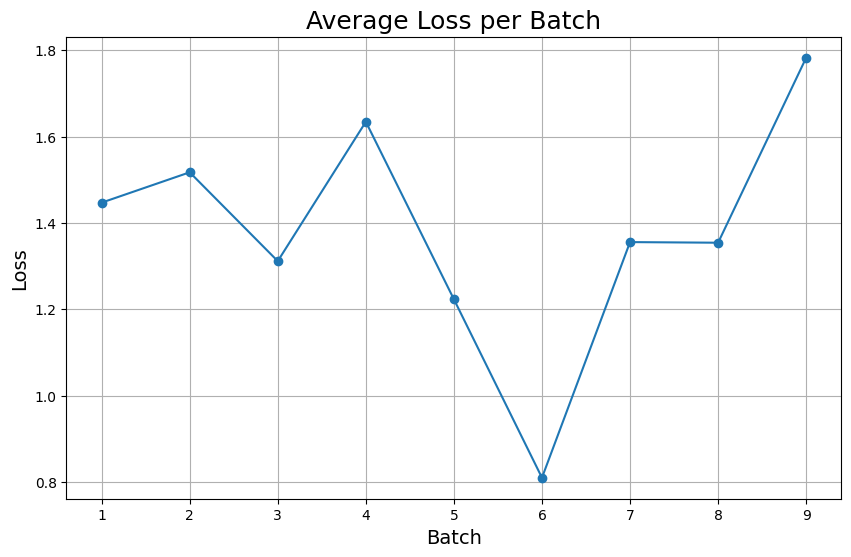

In [ ]:
hidden_layers=[4,4]
w1,b1,w2,b2,w_out,b_out,loss=train(x_train,y_train,hidden_layers)

In [ ]:
pred=predict(x_test,w1,b1,w2,b2,w_out,b_out)

In [ ]:
pred

array([0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0.])

In [ ]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

MODEL EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.6759776536312849

<Axes: >

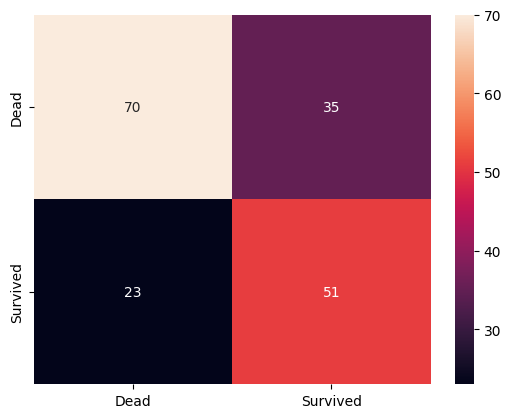

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)

data_cm=pd.DataFrame(cm,index=dict_live.values(),columns=dict_live.values())
sns.heatmap(data_cm,annot=True,fmt="d")
